<a href="https://colab.research.google.com/github/ArefPhD/A-program-to-retrive-citations-and-schaolar-page-of-authors/blob/master/notebooks/Iris%20Classification%20Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ### RIIAA 2.0 – Workshop 
> **Deep Learning as a Service** <br>
> **Instructor:** [Rodolfo Ferro](https://rodolfoferro.xyz) <br>
> **Email:** <ferro@cimat.mx> <br>
> **Twitter:** <https://twitter.com/FerroRodolfo/> <br>
> **GitHub:** <https://github.com/RodolfoFerro/> <br>

# Iris Classification Problem

Along this notebook we'll explain how to use the power of cloud computing with Google Colab for a classical example –*The Iris Classification Problem*– using the popular [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

For this classification problem we will build a simple feed-forward full-connected artificial neural network.

The Python framework that we will be using is [Tensorflow 2.0](https://www.tensorflow.org) with the [Keras](https://keras.io/) module.


### Problem statement

Before we tackle the problem an ANN, let's understand what we'll be doing: 

* If we feed our neural network with Iris data, the model should be able to determine what species it is.

> #### What do we need to do?
> Train a _Deep Learning_ model (in this case) using a known dataset: [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).
>
> Specifically, we are going to do the following:
> - Load the dataset
> - Preprocess the data
> - Build the model
> - Set hyperparameters 
> - Train the model
> - Save and download the trained model
> - Predict data

## Installing dependencies

For our training we will be using Tensorflow 2.0, so we want to be sure it is installed on its latest version:

In [1]:
# Let's install Tensorflow 2.0:
!pip install -q tensorflow==2.0.0-rc0

# And verify that it is now in its latest version:
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0-rc0 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0)
ERROR: No matching distribution found for tensorflow==2.0.0-rc0
2.8.0


## The Iris dataset

## Importing the dataset

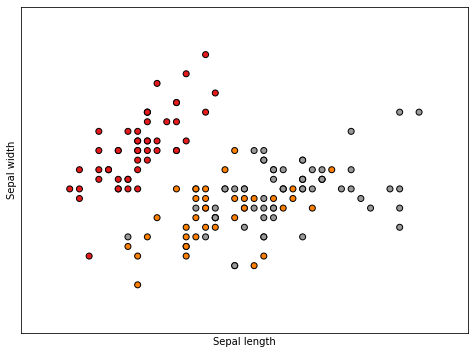

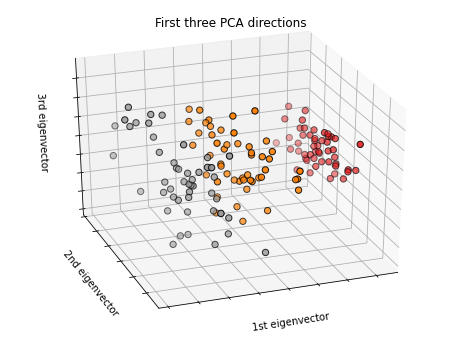

In [12]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])